In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df= pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df=df.drop('Item_Identifier',axis=1)
df=df.drop('Item_Type',axis=1)
df=df.drop('Outlet_Identifier',axis=1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Analyzing the data and columns

In [7]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [10]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
df.Item_Outlet_Sales.unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

# Data PreProcessing

In [12]:
df.Outlet_Size.fillna(0,inplace=True)

In [13]:
df['Outlet_Type'] = df['Outlet_Type'].replace(("Supermarket Type1", "Supermarket Type2","Grocery Store","Supermarket Type3"),(0,1,2,3))
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace(("Tier 1", "Tier 3","Tier 2"),(0,1,2))
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(("Low Fat", "Regular","low fat","LF","reg"),(0,1,2,3,4))
df['Outlet_Size'] = df['Outlet_Size'].replace(("High","Small","Medium"),(0,1,2))

In [14]:
df.Item_Weight.fillna(0,inplace=True)


In [15]:
df = df.drop('Outlet_Establishment_Year',axis=1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,249.8092,2,0,0,3735.1380
1,5.920,1,0.019278,48.2692,2,1,1,443.4228
2,17.500,0,0.016760,141.6180,2,0,0,2097.2700
3,19.200,1,0.000000,182.0950,0,1,2,732.3800
4,8.930,0,0.000000,53.8614,0,1,0,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,1,0,2778.3834
8519,8.380,1,0.046982,108.1570,0,2,0,549.2850
8520,10.600,0,0.035186,85.1224,1,2,0,1193.1136
8521,7.210,1,0.145221,103.1332,2,1,1,1845.5976


In [16]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

# Visualizing the data

C:\Users\Trapti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

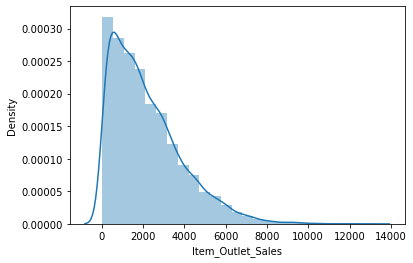

In [17]:
import seaborn as sns
sns.distplot(df.Item_Outlet_Sales, bins = 25) 

In [18]:
corr_matrix = abs(df.corr())
print(corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)) 

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Size             0.174914
Item_Visibility         0.128625
Outlet_Location_Type    0.099404
Item_Weight             0.053222
Item_Fat_Content        0.005906
Outlet_Type             0.005331
Name: Item_Outlet_Sales, dtype: float64


In [19]:
df = df.drop('Outlet_Type',axis=1)
df = df.drop('Item_Fat_Content',axis=1)
df


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,9.300,0.016047,249.8092,2,0,3735.1380
1,5.920,0.019278,48.2692,2,1,443.4228
2,17.500,0.016760,141.6180,2,0,2097.2700
3,19.200,0.000000,182.0950,0,1,732.3800
4,8.930,0.000000,53.8614,0,1,994.7052
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,1,2778.3834
8519,8.380,0.046982,108.1570,0,2,549.2850
8520,10.600,0.035186,85.1224,1,2,1193.1136
8521,7.210,0.145221,103.1332,2,1,1845.5976


# Applying Linear Regression

In [20]:
X = df.drop('Item_Outlet_Sales',axis=1)
Y = df['Item_Outlet_Sales']

In [21]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2, random_state =0)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred = reg.predict(X_test)
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
print(train_score)
print(test_score)
#print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred)))

0.4089488464971184
0.4015133783957612


# Applying RandomforestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=300,n_estimators=500)
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_train)
score = r2_score(y_train,y_pred_rfr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_rfr))) 
#print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_rfr))
train_score = rfr.score(X_train,y_train)
test_score = rfr.score(X_test,y_test)
print(train_score)
print(test_score)

Score of Training: 92.88873768896934
RMSE : 454.7483055346557
0.9288873768896934
0.4658912236962478


## Adaboost Regressor

In [39]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=2000,learning_rate=0.0001).fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr.predict(X_train)
score = r2_score(y_train,y_pred_rfr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_rfr))) 
#print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_rfr))
train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print(train_score)
print(test_score)

Score of Training: 45.116617441126216
RMSE : 1263.3339728656779
0.45116617441126217
0.4238261223805099


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
abr = GradientBoostingRegressor(learning_rate=0.01,n_estimators=5500).fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = abr.predict(X_train)
score = r2_score(y_train,y_pred_rfr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_rfr))) 
#print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_rfr))
train_score = abr.score(X_train,y_train)
test_score = abr.score(X_test,y_test)
print(train_score)
print(test_score)

Score of Training: 68.04317733406126
RMSE : 964.0055550554135
0.6804317733406126
0.4630872411459521
